<a href="https://colab.research.google.com/github/eazziz/Stroke-Prediction-Using-Machine-Learning/blob/main/Stroke_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#IMPORTING LIBRARIES

# Data manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-18-5f4e9dc6a555>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data['age_group'] = pd.cut(stroke_data['age'], bins=bins, labels=labels, right=False)


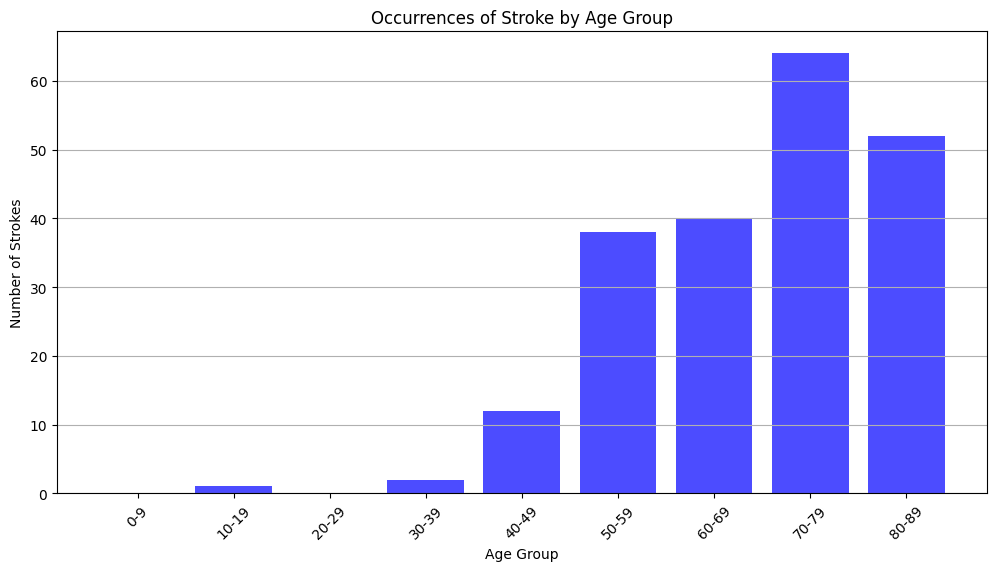

In [18]:
#PREPROCESSING.
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

#drops any duplicates or rows with missing data
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

#drops id column
df.drop('id', axis=1, inplace=True)
df.head()




#encoding categorical variables using label encoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])



# Creating age groups
stroke_data = df[df['stroke'] == 1]
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89]  # Define age bins
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']  # Define labels
stroke_data['age_group'] = pd.cut(stroke_data['age'], bins=bins, labels=labels, right=False)

# Count occurrences of strokes in each age group
age_group_counts = stroke_data['age_group'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(age_group_counts.index, age_group_counts.values, color='blue', alpha=0.7)
plt.title('Occurrences of Stroke by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Strokes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()



#normalization
scaler = StandardScaler()

numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

df[numerical_features] = scaler.fit_transform(df[numerical_features])


#4.Adressing imbalance with SMOTE
pre_X = df.drop('stroke', axis=1)
pre_Y = df['stroke']

smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(pre_X, pre_Y)





The bar graph above shows us the importance that age plays in likelihood of stroke. As people get older, their chances of having a stroke signifigantly increase! Our model will take this into account.

In [12]:
#TRAIN-TEST-SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}\n")




Training set size: 7520
Test set size: 1880



In [13]:
#LOGISTIC REGRESSION
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)


In [14]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

In [15]:
# EVALUATION
# Logistic Regression Scores
print("### Logistic Regression Results ###")
accuracy_log = accuracy_score(Y_test, Y_pred_log_reg)
precision_log = precision_score(Y_test, Y_pred_log_reg)
recall_log = recall_score(Y_test, Y_pred_log_reg)
f2_score_log = fbeta_score(Y_test, Y_pred_log_reg, beta=2)

print(f'Accuracy: {accuracy_log:.2f}')
print(f'Precision: {precision_log:.2f}')
print(f'Recall: {recall_log:.2f}')
print(f'F2-Score: {f2_score_log:.2f}')

# KNN Scores
print("\n### KNN Results ###")
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f2_score_knn = fbeta_score(Y_test, Y_pred_knn, beta=2)

print(f'Accuracy: {accuracy_knn:.2f}')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F2-Score: {f2_score_knn:.2f}')

### Logistic Regression Results ###
Accuracy: 0.79
Precision: 0.79
Recall: 0.81
F2-Score: 0.81

### KNN Results ###
Accuracy: 0.91
Precision: 0.85
Recall: 0.99
F2-Score: 0.96


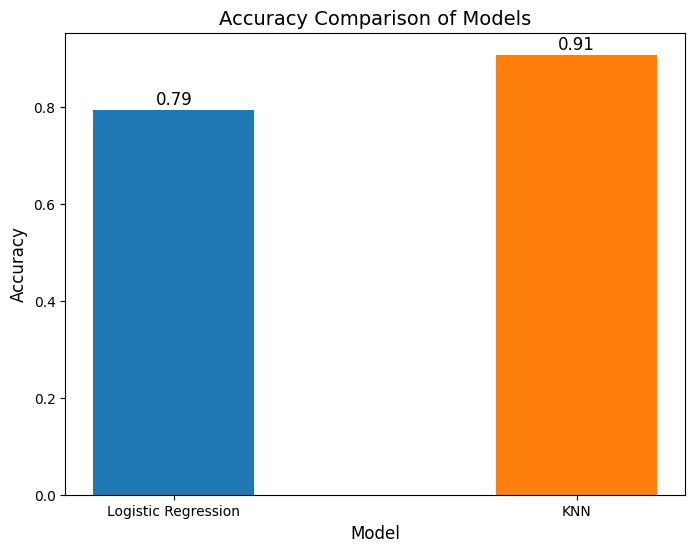

In [16]:
#PLOTTING MODEL ACCURACY
models = ['Logistic Regression', 'KNN']
accuracies = [accuracy_log, accuracy_knn]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Add bars with colors
bar_colors = ['#1f77b4', '#ff7f0e']  # Different colors for each bar
ax.bar(models, accuracies, color=bar_colors, width=0.4)

# Adding labels and title
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Comparison of Models', fontsize=14)

# Display accuracy values on top of bars
for i, acc in enumerate(accuracies):
    ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()

In [17]:
#ASKS USERS

def get_user_input():
    print("Enter the following details to predict the likelihood of stroke:")

    gender = int(input("Gender (0 = Male, 1 = Female): "))
    age = float(input("Age: "))
    hypertension = int(input("Hypertension (0 = No, 1 = Yes): "))
    heart_disease = int(input("Heart Disease (0 = No, 1 = Yes): "))
    ever_married = int(input("Ever Married (0 = No, 1 = Yes): "))
    work_type = int(input("Work Type (0 = Private, 1 = Self-employed, 2 = Children, 3 = Govt_job, 4 = Never worked): "))
    residence_type = int(input("Residence Type (0 = Urban, 1 = Rural): "))
    avg_glucose_level = float(input("Average Glucose Level: "))
    bmi = float(input("BMI: "))
    smoking_status = int(input("Smoking Status (0 = Never smoked, 1 = Unknown, 2 = Formerly smoked, 3 = Smokes): "))

    # Create a DataFrame from the input data
    user_data = pd.DataFrame([[gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status]],
                             columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])

    return user_data

# Assuming you've trained and normalized your data
def normalize_user_data(user_data, scaler):
    numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
    user_data[numerical_features] = scaler.transform(user_data[numerical_features])
    return user_data

# Make prediction
def predict_stroke():
    user_data = get_user_input()
    new_user_data = normalize_user_data(user_data, scaler)

    # Use trained model to predict
    prediction_log = log_reg.predict(new_user_data)  # Logistic Regression prediction
    prediction_knn = knn.predict(new_user_data) # KNN prediction

    # Display results
    print("\nPrediction Results:")

    if prediction_log == 1:
        print("Logistic Regression Model predicts a stroke.")
    else:
        print("Logistic Regression Model predicts no stroke.")

    if prediction_knn == 1:
        print("KNN Model predicts a stroke.")
    else:
        print("KNN Model predicts no stroke.")


# Call the function to predict based on user input
predict_stroke()


Enter the following details to predict the likelihood of stroke:
Gender (0 = Male, 1 = Female): 0
Age: 140
Hypertension (0 = No, 1 = Yes): 1
Heart Disease (0 = No, 1 = Yes): 1
Ever Married (0 = No, 1 = Yes): 1
Work Type (0 = Private, 1 = Self-employed, 2 = Children, 3 = Govt_job, 4 = Never worked): 3
Residence Type (0 = Urban, 1 = Rural): 1
Average Glucose Level: 390
BMI: 54
Smoking Status (0 = Never smoked, 1 = Unknown, 2 = Formerly smoked, 3 = Smokes): 3

Prediction Results:
Logistic Regression Model predicts a stroke.
KNN Model predicts a stroke.
